In [14]:
import math as mt
import numpy as np
import matplotlib.pyplot as plt

In [15]:
#circle perimeter and radius
n=10
r=n/2/mt.pi

#length of step
l=n/100

#we divided the circle into int(n/l) parts
partition=int(n/l)

#number of step
num=100

#probability of walking clockwise
p=0.6

#orginal position
orgin=5
o=orgin

In [16]:
#one step RW function, return the updated position(float)
def SimpleRW(o,p,l,n):
    step=np.random.choice(np.array([-l,l]),p=[1-p,p])
    return (step+o)%n

In [17]:
#plot Circle
def Circle(r):
    c1=np.linspace(-r,r,1000)
    c2=np.sqrt(r**2-c1**2)
    plt.plot(c1,c2,c1,-c2,c='b')

#Save pic function
def SavePlot(i):
    txt='{}.png'.format(i)
    plt.savefig(txt)
    return txt

#Get x and y
def GetXY(o,n,r):
    x=-r*mt.cos(o/n*2*mt.pi)
    y=r*mt.sin(o/n*2*mt.pi)
    return x,y

#plot position
def Position(x,y,r,i):
    Circle(r)
    plt.plot(x,y,marker='o',markerfacecolor='r')
    plt.title('Random Walk in a Circle\n (P(Walking clockwise)={})'.format(p))
    filename=SavePlot(i+1)
    plt.clf()
    return filename

'Track of Position.png'

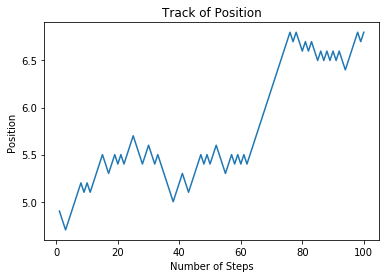

In [18]:
filenames=[]
position=[]

for i in range(num):
    o=SimpleRW(o,p,l,n)
    position.append(o)
    x,y=GetXY(o,n,r)
    filename=Position(x,y,r,i)
    filenames.append(filename)

plt.plot(np.linspace(1,num,num),position)
plt.xlabel('Number of Steps')
plt.ylabel('Position')
plt.title('Track of Position')
SavePlot('Track of Position')

In [19]:
import imageio
def GIF(filenames,title,duration=0.1):
    images=[]
    for filename in filenames:
        images.append(imageio.imread(filename))
    imageio.mimsave('{}.gif'.format(title),images,duration=duration)

In [20]:
GIF(filenames,'final')


#Markov Chain Method


In [21]:
def Markov_Chain(p):

    #initialize transtion matrix
    TM=np.zeros((partition,partition))
    for i in range(partition):
        for j in range(partition):
            if i==(j+1)%partition:
                TM[i][j]=1-p
            if i==(j-1)%partition:
                TM[i][j]=p

    #initial distribution
    ini=np.zeros(partition)
    ini[int(orgin/l)]=1
    return ini,TM

def Mth_dis(m,ini,TM):
    return np.dot(ini,np.linalg.matrix_power(TM,m))


In [22]:
filenames=[]
step=0.01
for p in np.arange(0,1,step):
    distributions=[]
    ini,TM=Markov_Chain(p)
    for i in range(num):
        distributions.append(Mth_dis(i,ini,TM))
    plt.figure(figsize=(10,10))
    plt.imshow(distributions)
    plt.ylabel('number of steps')
    plt.xlabel('position on the circle\n (divide the circle to {} parts)'.format(partition))
    plt.title('P(walking clockwise)={}'.format(round(p,3)))
    filenames.append(SavePlot(p))
    plt.clf()
    plt.close()
title='Markov Chain RW in a circle'
GIF(filenames,title,0.1)